In [6]:
!nvidia-smi

Thu Sep 14 01:04:31 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 536.40                 Driver Version: 536.40       CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 4060 ...  WDDM  | 00000000:01:00.0  On |                  N/A |
| N/A   57C    P8               5W /  80W |    197MiB /  8188MiB |     31%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [31]:
import tensorflow as tf
from tensorflow.python.client import device_lib
import keras_cv
import matplotlib.pyplot as plt

In [32]:
print(device_lib.list_local_devices())


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17018890155560449520
xla_global_id: -1
]


In [17]:
model = keras_cv.models.StableDiffusion(img_height=512, img_width=512, jit_compile=True)

By using this model checkpoint, you acknowledge that its usage is subject to the terms of the CreativeML Open RAIL-M license at https://raw.githubusercontent.com/CompVis/stable-diffusion/main/LICENSE


In [12]:
images = model.text_to_image(
    prompt="garden",
    batch_size=1,  # How many images to generate at once
    num_steps=25,  # Number of iterations (controls image quality)
    # seed=123,  # Set this to always get the same image from the same prompt
)
# Image.fromarray(img[0]).save("horse.png")
print(images.shape)
# plt.imshow(images)
# print("saved at horse.png")

25/25 [==============================] - 211s 8s/step
(1, 512, 512, 3)


In [13]:
def plot_images(images):
    plt.figure(figsize=(20,20))

    for i in range(len(images)):
        ax = plt.subplot(1, len(images), i + 1)
        plt.imshow(images[i])
        plt.axis('off')
        plt.tight_layout()


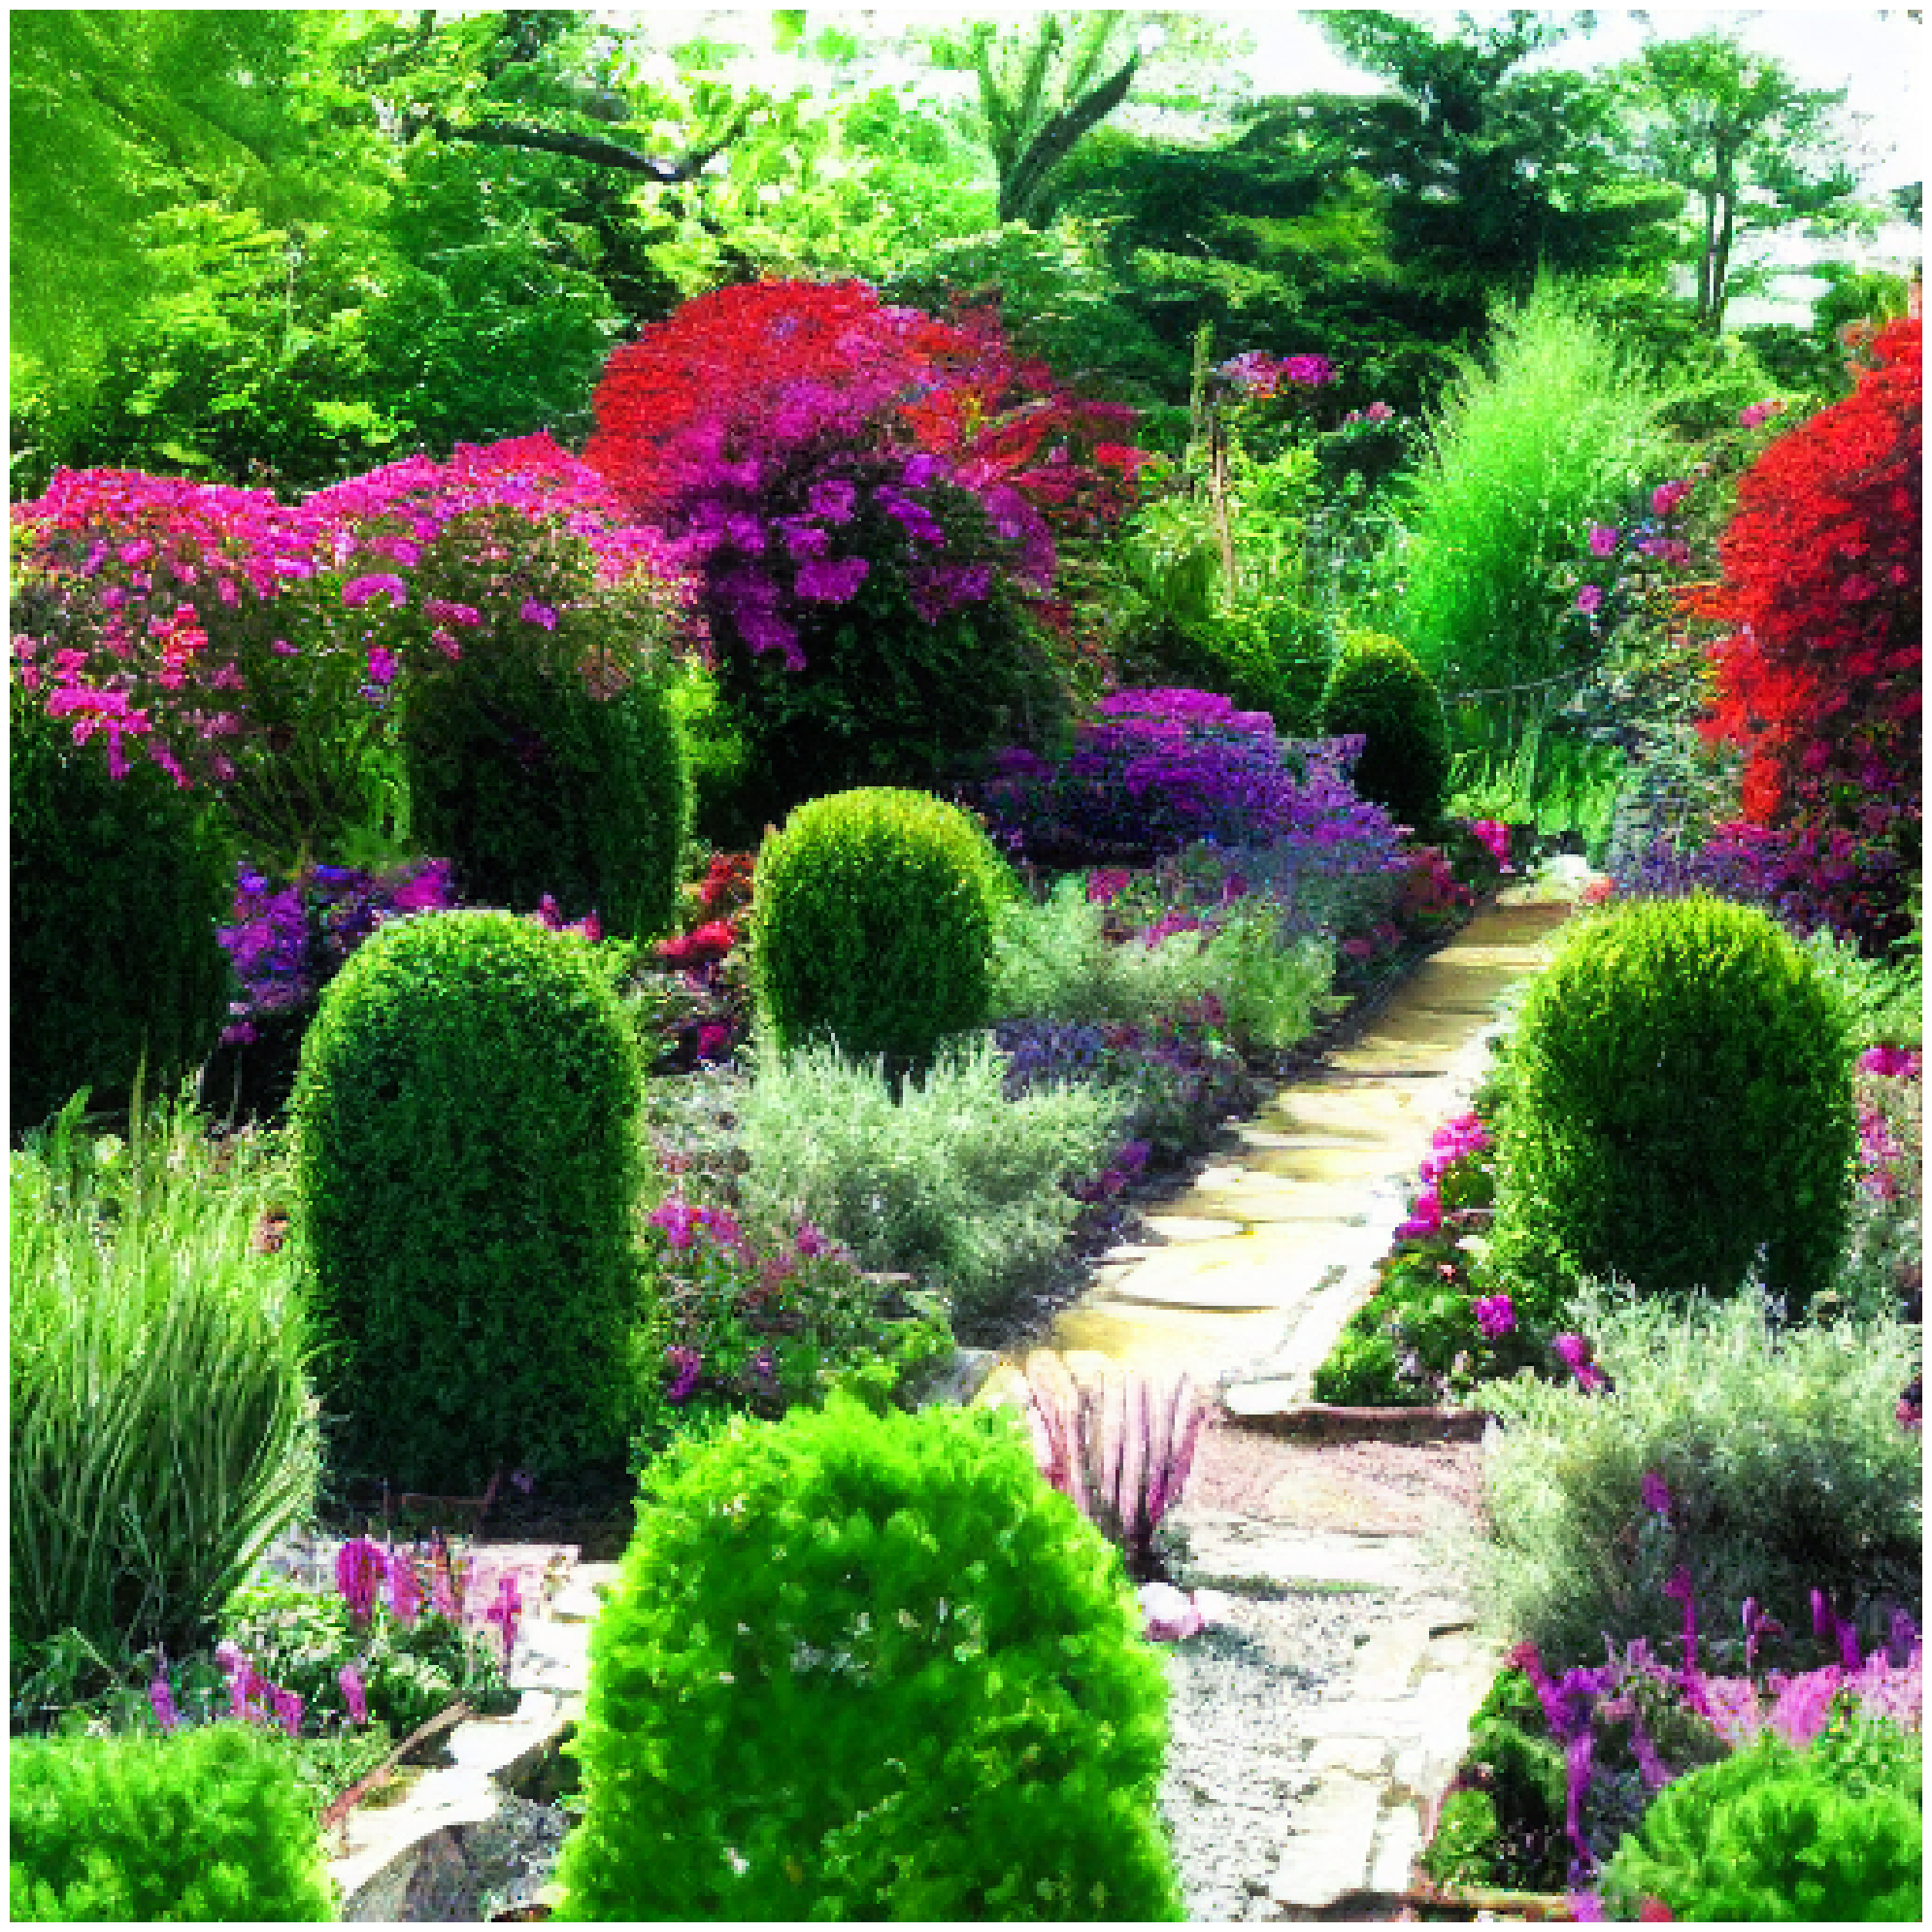

In [14]:
plot_images(images)

In [20]:
from translate import Translator

translator = Translator(from_lang="ko", to_lang="en")

translation = translator.translate("수많은 아이들이 모나리자를 보면서 웃는 사진")

translation

'Lots of kids laughing at the Mona Lisa'

25/25 [==============================] - 229s 9s/step


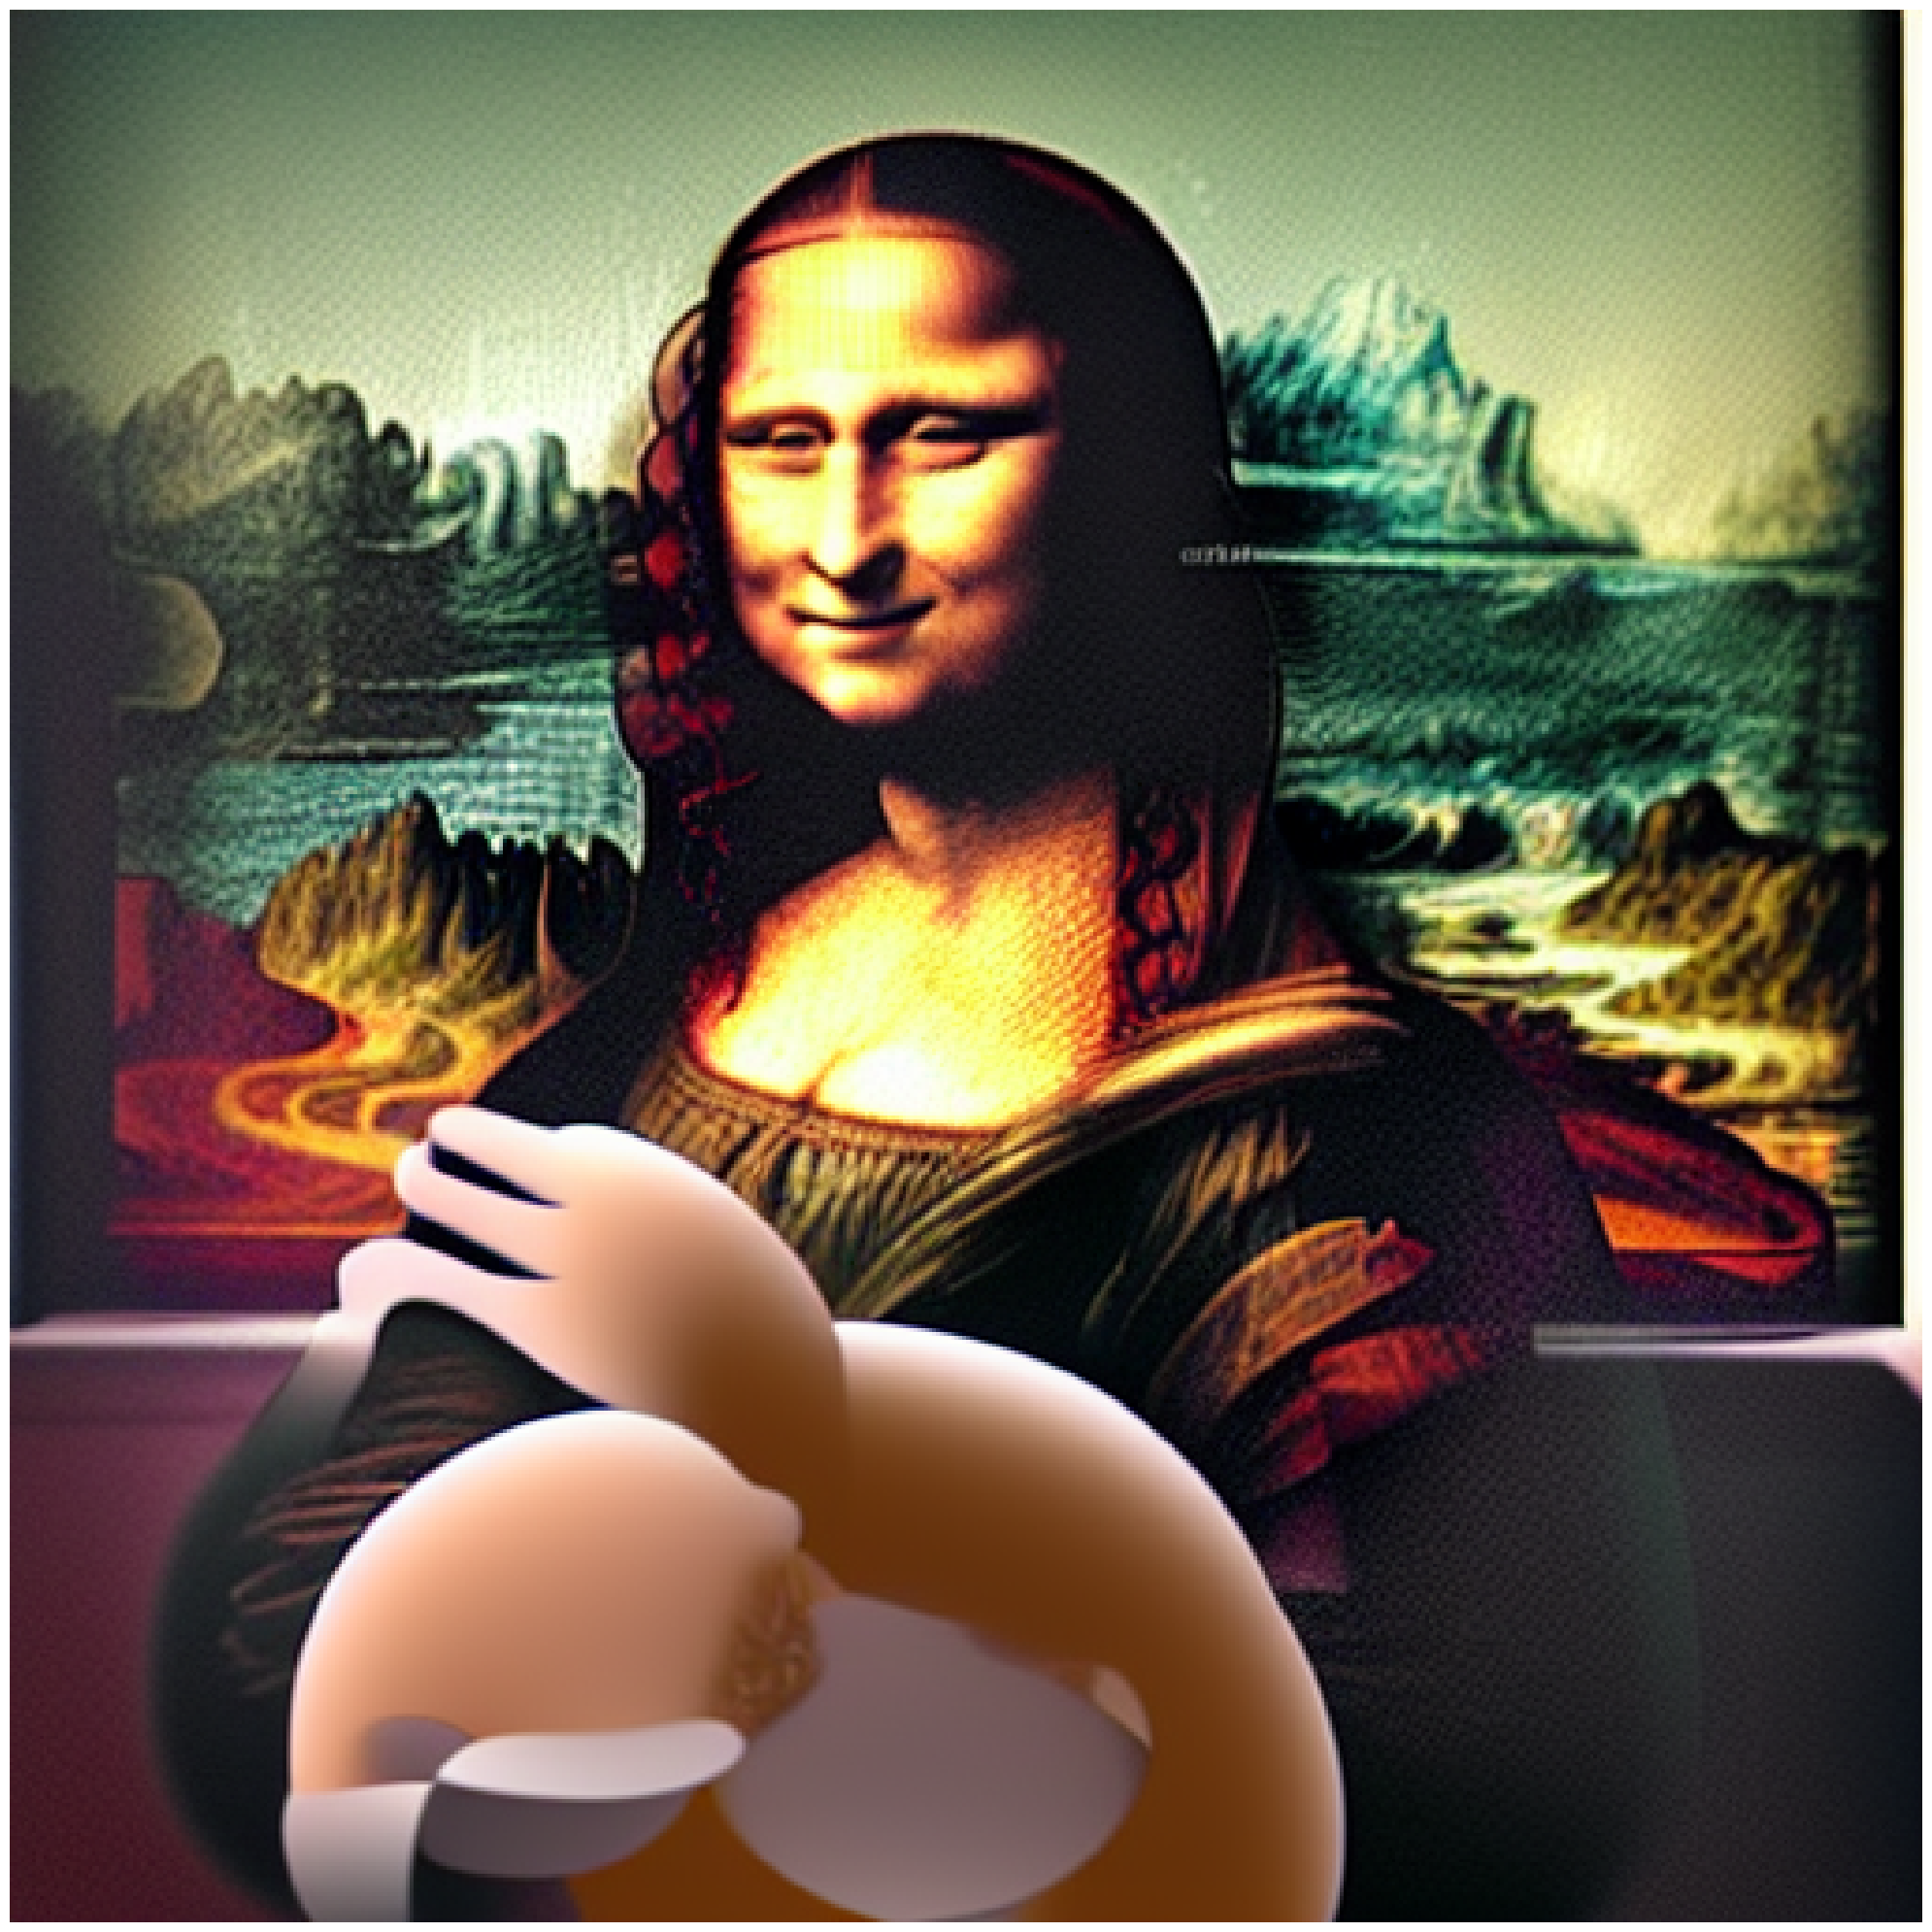

In [23]:
images = model.text_to_image(translation,    
                             batch_size=1,
                            num_steps=25)

plot_images(images)

Watercolor of a rabbit digging a hole in a lawn
25/25 [==============================] - 647s 24s/step


C:\Users\lioki\AppData\Local\Temp\ipykernel_7768\1538138692.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


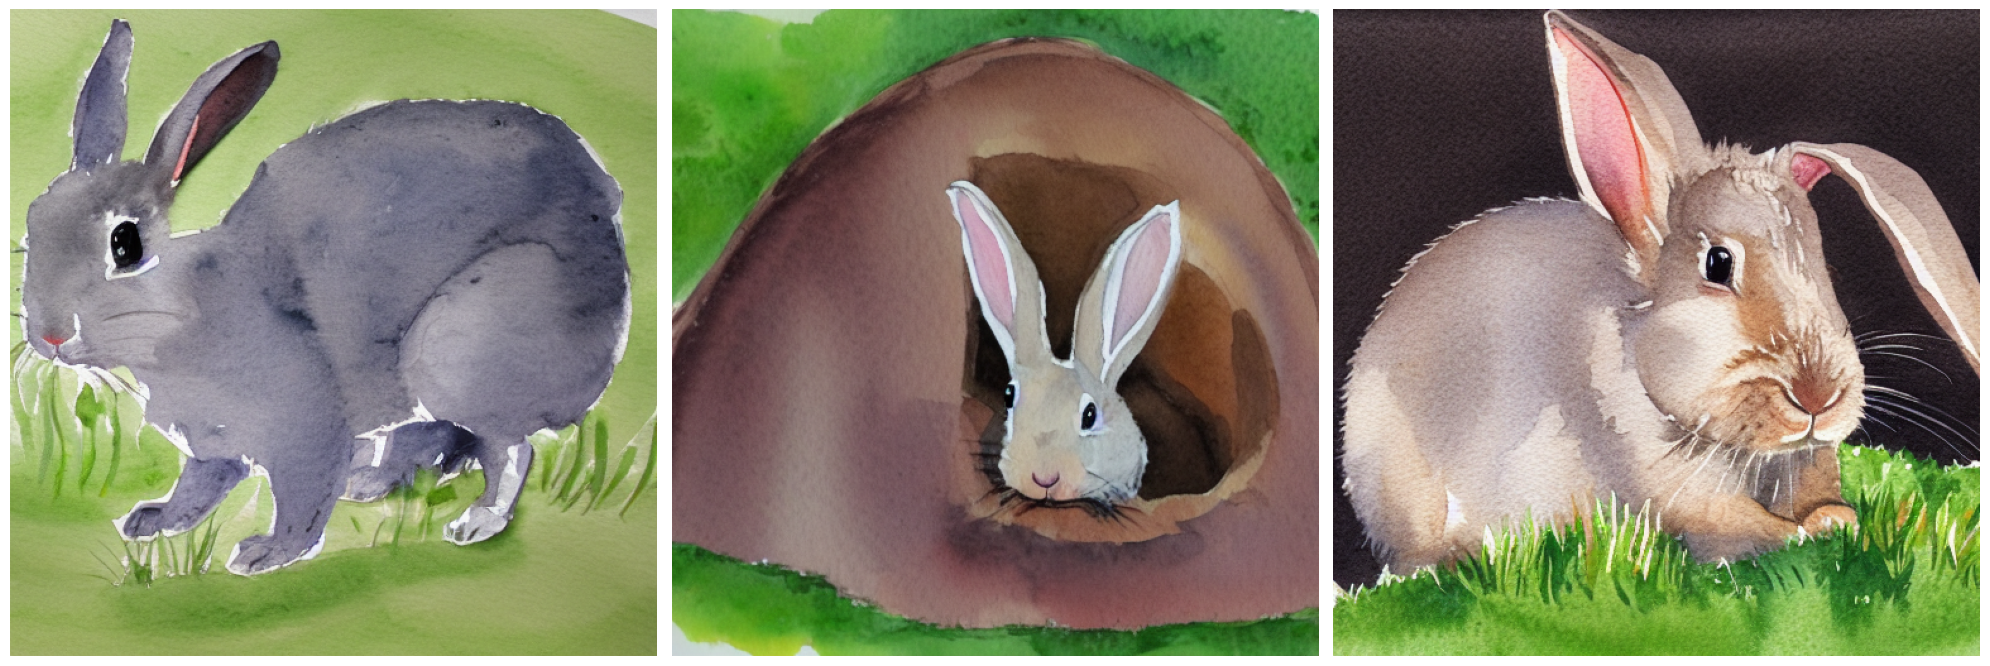

In [24]:
def generate_images(text, n=3):
    translation = translator.translate(text)

    print(translation)

    images = model.text_to_image(translation,    
                            batch_size=n,
                            num_steps=25)
    
    return images

images = generate_images("토끼가 잔디밭에 구멍을 파고 있는 모습의 수채화")

plot_images(images)

In [34]:
import gradio as gr

def infetence(text):
    images = generate_images(text, n=1).squeeze()
    return images

demo = gr.Interface(fn=infetence, inputs="text", outputs="image")

demo.launch(debug=True, share=True)

Running on local URL:  http://127.0.0.1:7860
Running on public URL: https://b5dbf27941da452d8c.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


Saint Seiya
25/25 [==============================] - 223s 9s/step
The Milky Way in the Sky
25/25 [==============================] - 233s 9s/step
Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://b5dbf27941da452d8c.gradio.live
